# Regression - FFNN - one_hot + normalize

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.preprocessing import StandardScaler

In [3]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import backend as K
import tensorflow as tf

In [4]:
df = pd.read_csv('abalone.data',
                 names=['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings'])

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
df['Sex'] = df['Sex'].replace(('I','M','F'),(3,1,2))

X = df.iloc[:,:-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [7]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
dummy = pd.get_dummies(df['Sex'])
dummy.head()

df = pd.concat([df.iloc[:,0], dummy, df.iloc[:,1:]], axis=1)

X = df.iloc[:,1:-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [10]:
df.head()

,Sex,1,2,3,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1,1,0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,1,0,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,0,1,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,1,0,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,3,0,0,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [11]:
scaler = StandardScaler()
scaler.fit(X[:,3:])

X_train_scaled = scaler.transform(X_train[:,3:])
X_test_scaled = scaler.transform(X_test[:,3:])

In [12]:
X_train_scaled = np.concatenate((X_train[:,:3], X_train_scaled), axis=1)
X_test_scaled = np.concatenate((X_test[:,:3], X_test_scaled), axis=1)

## Build Model

In [16]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(10,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1))

In [17]:
def coeff(y_true, y_pred):
    SS_res = K.sum(K.square(y_true-y_pred)) 
    SS_tot = K.sum(K.square(y_true-K.mean(y_true))) 
    return (1 - SS_res/(SS_tot+K.epsilon()))

model.compile(optimizer='adam', loss='mse', metrics=['mae', coeff])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                352       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_6 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total params: 10,913
Trainable params: 10,913
Non-trainable params: 0
_________________________________________________________________


In [ ]:
epochs = 100
batch_size=128

history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=[X_test_scaled, y_test])

In [ ]:
y_pred = model.predict(X_test_scaled)

## Evaluate

In [ ]:
print('Score')
print('MSE :      ', mse(y_test, y_pred))
print('RMSE :     ', np.sqrt(mse(y_test, y_pred)))
print('r2_score : ', r2(y_test, y_pred))

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim((0,8))
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['coeff'])
plt.plot(history.history['val_coeff'])
plt.ylabel('R2 score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.ylim((-1,1.5))
plt.show()

a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred, c=[(1, 0.7, 0.0),], marker='+')
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 25]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

## Build Model

In [29]:
regulizer = tf.keras.regularizers.l2(l=0.01)

model = Sequential()
model.add(Dense(32, kernel_regularizer=regulizer,  input_shape=(10,)))
model.add(Dense(64, activation='relu', kernel_regularizer=regulizer))
model.add(Dense(128, activation='relu', kernel_regularizer=regulizer))
model.add(Dense(1))

In [30]:
def coeff(y_true, y_pred):
    SS_res = K.sum(K.square(y_true-y_pred)) 
    SS_tot = K.sum(K.square(y_true-K.mean(y_true))) 
    return (1 - SS_res/(SS_tot+K.epsilon()))

# optimizer = tf.optimizers.Adam(learning_rate=0.0001)
# model.compile(optimizer=optimizer, loss='mse', metrics=['mae', coeff])
model.compile(optimizer='adam', loss='mse', metrics=['mae', coeff])

In [31]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 32)                352       
_________________________________________________________________
dense_17 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_18 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 129       
Total params: 10,913
Trainable params: 10,913
Non-trainable params: 0
_________________________________________________________________


In [32]:
epochs = 150
batch_size=128

history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=[X_test_scaled, y_test])

Train on 3341 samples, validate on 836 samples
Epoch 1/150
3341/3341 [==============================] - 1s 248us/sample - loss: 70.9476 - mae: 7.4197 - coeff: -5.9576 - val_loss: 35.5853 - val_mae: 4.7893 - val_coeff: -2.1484
Epoch 2/150
3341/3341 [==============================] - 0s 51us/sample - loss: 23.8059 - mae: 3.6601 - coeff: -1.2425 - val_loss: 13.1607 - val_mae: 2.5240 - val_coeff: -0.0669
Epoch 3/150
3341/3341 [==============================] - 0s 52us/sample - loss: 9.1992 - mae: 2.0056 - coeff: 0.2425 - val_loss: 7.6644 - val_mae: 1.7397 - val_coeff: 0.4303
Epoch 4/150
3341/3341 [==============================] - 0s 49us/sample - loss: 7.1664 - mae: 1.6724 - coeff: 0.4406 - val_loss: 7.0863 - val_mae: 1.6876 - val_coeff: 0.4821
Epoch 5/150
3341/3341 [==============================] - 0s 46us/sample - loss: 6.7730 - mae: 1.6461 - coeff: 0.4499 - val_loss: 7.0088 - val_mae: 1.6435 - val_coeff: 0.4872
Epoch 6/150
3341/3341 [==============================] - ETA: 0s - loss: 6

3341/3341 [==============================] - 0s 44us/sample - loss: 5.0028 - mae: 1.4545 - coeff: 0.5893 - val_loss: 5.3149 - val_mae: 1.4926 - val_coeff: 0.5922
Epoch 48/150
3341/3341 [==============================] - 0s 43us/sample - loss: 5.0995 - mae: 1.4879 - coeff: 0.5621 - val_loss: 5.3258 - val_mae: 1.5023 - val_coeff: 0.5900
Epoch 49/150
3341/3341 [==============================] - 0s 42us/sample - loss: 5.1169 - mae: 1.4924 - coeff: 0.5640 - val_loss: 5.9603 - val_mae: 1.5440 - val_coeff: 0.5340
Epoch 50/150
3341/3341 [==============================] - 0s 41us/sample - loss: 5.0818 - mae: 1.4707 - coeff: 0.5595 - val_loss: 5.2937 - val_mae: 1.5235 - val_coeff: 0.5912
Epoch 51/150
3341/3341 [==============================] - 0s 42us/sample - loss: 5.0359 - mae: 1.4708 - coeff: 0.5653 - val_loss: 5.2827 - val_mae: 1.5237 - val_coeff: 0.5913
Epoch 52/150
3341/3341 [==============================] - 0s 42us/sample - loss: 5.0056 - mae: 1.4682 - coeff: 0.5740 - val_loss: 5.4505 -

Epoch 94/150
3341/3341 [==============================] - 0s 50us/sample - loss: 4.7594 - mae: 1.4578 - coeff: 0.5829 - val_loss: 5.1675 - val_mae: 1.4818 - val_coeff: 0.5858
Epoch 95/150
3341/3341 [==============================] - 0s 47us/sample - loss: 4.6659 - mae: 1.4430 - coeff: 0.5875 - val_loss: 5.5032 - val_mae: 1.5059 - val_coeff: 0.5559
Epoch 96/150
3341/3341 [==============================] - 0s 50us/sample - loss: 4.6326 - mae: 1.4311 - coeff: 0.6011 - val_loss: 4.9636 - val_mae: 1.4936 - val_coeff: 0.6003
Epoch 97/150
3341/3341 [==============================] - 0s 50us/sample - loss: 4.6949 - mae: 1.4392 - coeff: 0.5374 - val_loss: 5.1790 - val_mae: 1.4877 - val_coeff: 0.5835
Epoch 98/150
3341/3341 [==============================] - 0s 48us/sample - loss: 4.6703 - mae: 1.4429 - coeff: 0.5922 - val_loss: 5.3858 - val_mae: 1.4949 - val_coeff: 0.5649
Epoch 99/150
3341/3341 [==============================] - 0s 47us/sample - loss: 4.7104 - mae: 1.4448 - coeff: 0.5919 - val_l

3341/3341 [==============================] - 0s 45us/sample - loss: 4.5272 - mae: 1.4332 - coeff: 0.5985 - val_loss: 4.9985 - val_mae: 1.4957 - val_coeff: 0.5894
Epoch 141/150
3341/3341 [==============================] - 0s 45us/sample - loss: 4.5337 - mae: 1.4422 - coeff: 0.6022 - val_loss: 5.0336 - val_mae: 1.4803 - val_coeff: 0.5863
Epoch 142/150
3341/3341 [==============================] - 0s 45us/sample - loss: 4.5011 - mae: 1.4249 - coeff: 0.6024 - val_loss: 5.2351 - val_mae: 1.5087 - val_coeff: 0.5687
Epoch 143/150
3341/3341 [==============================] - 0s 40us/sample - loss: 4.5793 - mae: 1.4442 - coeff: 0.5874 - val_loss: 4.9941 - val_mae: 1.4792 - val_coeff: 0.5896
Epoch 144/150
3341/3341 [==============================] - 0s 43us/sample - loss: 4.5176 - mae: 1.4281 - coeff: 0.5938 - val_loss: 5.3890 - val_mae: 1.4996 - val_coeff: 0.5560
Epoch 145/150
3341/3341 [==============================] - 0s 43us/sample - loss: 4.5269 - mae: 1.4229 - coeff: 0.5946 - val_loss: 4.9

In [33]:
y_pred = model.predict(X_test_scaled)

## Evaluate

In [34]:
print('Score')
print('MSE :      ', mse(y_test, y_pred))
print('RMSE :     ', np.sqrt(mse(y_test, y_pred)))
print('r2_score : ', r2(y_test, y_pred))

Score
MSE :       4.509464232082118
RMSE :      2.123549912783337
r2_score :  0.5981463039090056


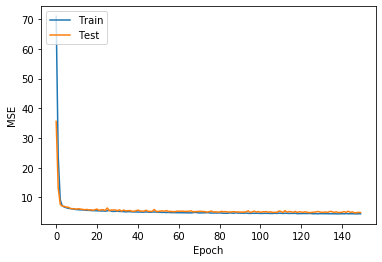

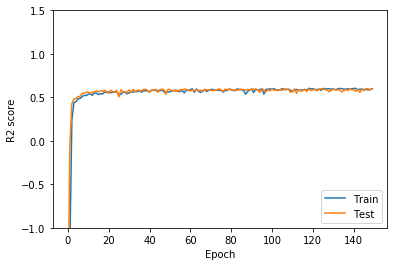

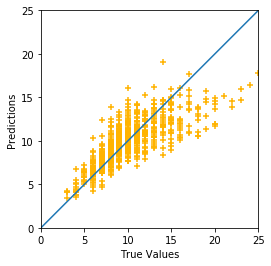

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
# plt.ylim((0,8))
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['coeff'])
plt.plot(history.history['val_coeff'])
plt.ylabel('R2 score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.ylim((-1,1.5))
plt.show()

a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred, c=[(1, 0.7, 0.0),], marker='+')
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 25]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)